<a href="https://colab.research.google.com/github/moises-rb/DS_ONE/blob/main/Estatistica_MachineLearning/6%20-%20Classificacao_Validacao_Modelos_Metricas_Avaliacao/Projeto_Classifica%C3%A7%C3%A3o_Valida%C3%A7%C3%A3o_e_m%C3%A9tricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

In [ ]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/moises-rb/DS_ONE/refs/heads/main/Estatistica_MachineLearning/6%20-%20Classificacao_Validacao_Modelos_Metricas_Avaliacao/base_dados/emp_automovel.csv'

In [4]:
dados = pd.read_csv(url)
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [7]:
 x = dados.drop('inadimplente', axis=1)
 y = dados['inadimplente']

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
modelo = DecisionTreeClassifier()
modelo.fit(x, y)
modelo.score(x, y)

1.0

In [10]:
print(f'Acurácia do modelo: {modelo.score(x, y) * 100:.2f}%')

Acurácia do modelo: 100.00%


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size=0.15, random_state=5, stratify=y)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, random_state=5, stratify=y)

In [13]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)
print(f'Acurácia do treino: {modelo.score(x_treino, y_treino) * 100:.2f}%')
print(f'Acurácia de validação: {modelo.score(x_val, y_val) * 100:.2f}%')

Acurácia do treino: 100.00%
Acurácia de validação: 84.93%


In [14]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia do treino: {modelo.score(x_treino, y_treino) * 100:.2f}%')
print(f'Acurácia de validação: {modelo.score(x_val, y_val) * 100:.2f}%')

Acurácia do treino: 92.06%
Acurácia de validação: 90.58%


In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[10356   123]
 [  958    44]]


In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

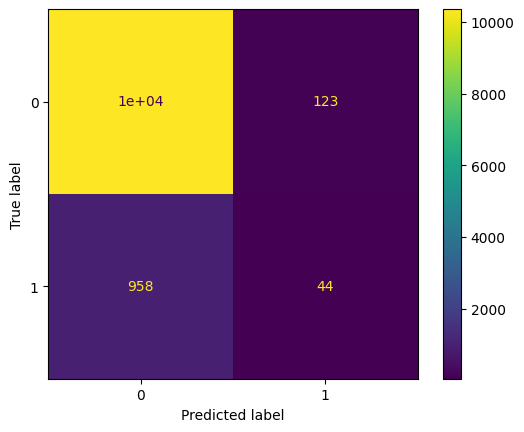

In [18]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao)
visualizacao.plot();

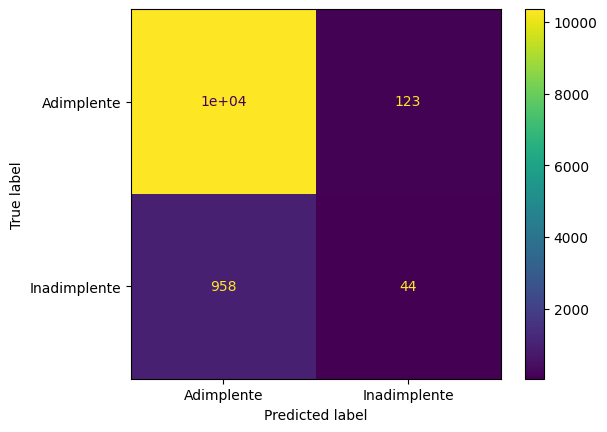

In [19]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
modelo = RandomForestClassifier(max_depth = 10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia do treino: {modelo.score(x_treino, y_treino) * 100:.2f}%')
print(f'Acurácia de validação: {modelo.score(x_val, y_val) * 100:.2f}%')

Acurácia do treino: 91.54%
Acurácia de validação: 91.29%


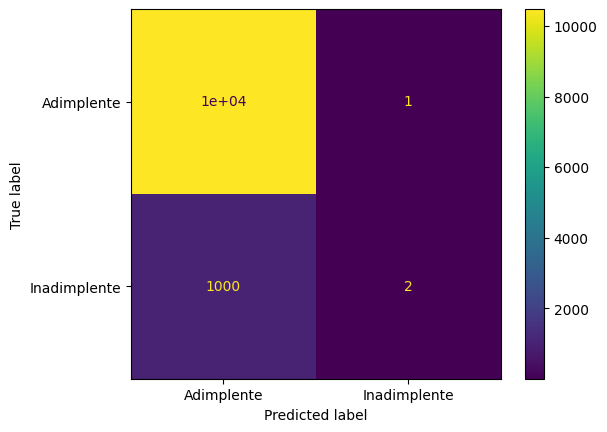

In [23]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
visualizacao = ConfusionMatrixDisplay(confusion_matrix= matriz_confusao,
                                      display_labels = ['Adimplente', 'Inadimplente'])
visualizacao.plot();